In [19]:
from curses.ascii import isdigit
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr2tapn/')
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/vco/Projects/pm4py-dcr2tapn
/home/vco/Projects/pm4py-dcr2tapn


In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from copy import deepcopy
from pm4py.objects.dcr.obj import dcr_template
from pm4py.objects.dcr.importer import importer as dcr_importer
from pm4py.objects.dcr.exporter import exporter as dcr_exporter
from pm4py.objects.dcr.utils.utils import nested_groups_and_sps_to_flat_dcr
from notebooks_projects.latex_helper import *

# New conversion via arc pattern tables


\begin{tabular}{cr|c|c|c|c|c|c|c|c|c}
$ Original $ & & \multicolumn{4}{c|}{MakePayment} & \multicolumn{1}{c|}{EditPaymentInfo} & \multicolumn{4}{c}{AddOrder} \\ 
& &  In & Ex & Re(5) & Rex(5) & Ex & In & Ex & Re(1) & Rex(1) \\ \cline{2-11} 
\multirow{11}{*}{AddOrder} & $t_{0}$ & \readArc{} &  & \inhiboa{} &  &  & \ia{} & \readArc{} & \inhib{} &  \\ \cline{2-11} 
 & $t_{1}$ & \readArc{} &  & \inhiboa{} &  &  & \ia{} & \inhiboa{} & \ia{} &  \\ \cline{2-11} 
 & $t_{2}$ & \readArc{} &  & \inhiboa{} &  &  & \ia{} & \readArc{} & \ia{} &  \\ \cline{2-11} 
 & $t_{3}$ & \readArc{} &  & \readArc{} &  &  & \ia{} & \readArc{} & \inhib{} &  \\ \cline{2-11} 
 & $t_{4}$ & \readArc{} &  & \readArc{} &  &  & \ia{} & \inhiboa{} & \ia{} &  \\ \cline{2-11} 
 & $t_{5}$ & \readArc{} &  & \readArc{} &  &  & \ia{} & \readArc{} & \ia{} &  \\ \cline{2-11} 
 & $t_{6}$ & \inhiboa{} &  & \inhiboa{} & \inhib{} &  & \ia{} & \readArc{} & \inhib{} &  \\ \cline{2-11} 
 & $t_{7}$ & \inhiboa{} &  & \inhiboa{} & \inhib{}

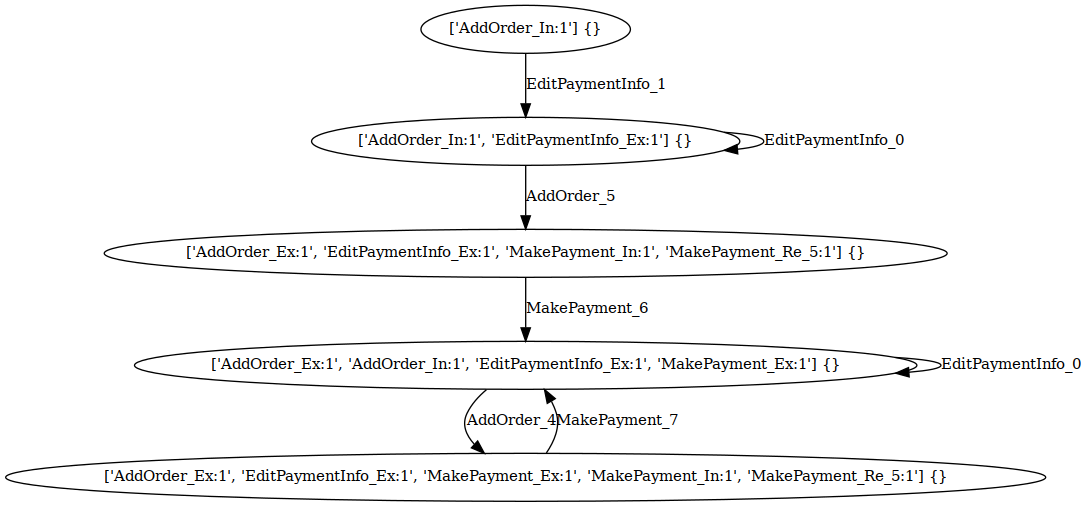

[i] export to models/milestone-deadlock.tapn

\begin{tabular}{cr|c|c|c|c|c|c|c}
$ Deadlock $ & & \multicolumn{4}{c|}{MakePayment} & \multicolumn{1}{c|}{EditPaymentInfo} & \multicolumn{2}{c}{AddOrder} \\ 
& &  In & Ex & Re(5) & Rex(5) & Ex & In & Ex \\ \cline{2-9} 
\multirow{7}{*}{AddOrder} & $t_{0}$ & \readArc{} &  & \inhiboa{} &  & \ttioa & \ia{} & \readArc{} \\ \cline{2-9} 
 & $t_{1}$ & \readArc{} &  & \inhiboa{} &  & \ttioa & \ia{} & \inhiboa{} \\ \cline{2-9} 
 & $t_{2}$ & \readArc{} &  & \readArc{} &  & \ttioa & \ia{} & \readArc{} \\ \cline{2-9} 
 & $t_{3}$ & \readArc{} &  & \readArc{} &  & \ttioa & \ia{} & \inhiboa{} \\ \cline{2-9} 
 & $t_{4}$ & \inhiboa{} &  & \inhiboa{} & \inhib{} & \ttioa & \ia{} & \readArc{} \\ \cline{2-9} 
 & $t_{5}$ & \inhiboa{} &  & \inhiboa{} & \inhib{} & \ttioa & \ia{} & \inhiboa{} \\ \cline{2-9} 
 & $t_{6}$ & \inhiboa{} &  & \oa{} & \ia{} & \ttioa & \ia{} & \readArc{} \\ \cline{2-9} 
 & $t_{7}$ & \inhiboa{} &  & \oa{} & \ia{} & \ttioa & \ia{} & \inhiboa{

In [52]:
from pm4py.objects.conversion.dcr_apt.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri
# example = 'models/RunningExampleTAPNoriginal.xml'
example = 'models/dcr-original.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/original.tapn')
print()
print(table_to_latex_general(master_df,'Original',dcr_dict,dcr2tapn.delay_dict))

# example = 'models/RunningExampleTAPNoriginal-livelock.xml'
example = 'models/dcr-original-livelock.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/original-livelock.tapn')
print()
print(table_to_latex_general(master_df,'Livelock',dcr_dict,dcr2tapn.delay_dict))
# example = 'models/RunningExampleTAPNMilestone.xml'
example = 'models/dcr-milestone-deadlock.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=True,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/milestone-deadlock.tapn')
print()
tabular =table_to_latex_general(master_df,'Deadlock',dcr_dict,dcr2tapn.delay_dict)
print(tabular)
example = 'models/dcr-milestone-deadlock-fixed.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/milestone-deadlock-fixed.tapn')
print()
print(table_to_latex_general(master_df,'Deadlock-fixed',dcr_dict,dcr2tapn.delay_dict))
example = 'models/dcr-original-2deadlines.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/original-2deadlines.tapn')
print()
print(table_to_latex_general(master_df,'Original-2Deadlines',dcr_dict,dcr2tapn.delay_dict))

In [56]:
from pm4py.objects.conversion.dcr_apt.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri

example = 'models/dcr-original.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/original.tapn')
print()
print(table_to_latex_general(master_df,'Original (Livelock)',dcr_dict,dcr2tapn.delay_dict))

example = 'models/dcr-livelock-fix.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/livelock-fix.tapn')
print()
print(table_to_latex_general(master_df,'Repaired',dcr_dict,dcr2tapn.delay_dict))

example = 'models/dcr-deadlock.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/deadlock.tapn')
print()
print(table_to_latex_general(master_df,'Deadlock',dcr_dict,dcr2tapn.delay_dict))


\begin{tabular}{cr|c|c|c|c|c|c|c}
$ Original (Livelock) $ & & \multicolumn{4}{c|}{MakePayment} & \multicolumn{1}{c|}{EditPaymentInfo} & \multicolumn{2}{c}{AddOrder} \\ 
& &  In & Ex & Re(5) & Rex(5) & Ex & In & Ex \\ \cline{2-9} 
\multirow{1}{*}{EditPaymentInfo} & $t_{0}$ &  &  &  &  & \readArc{} &  &  \\ \cline{2-9} 
 & $t_{1}$ &  &  &  &  & \inhiboa{} &  &  \\ \hline 
\multirow{7}{*}{AddOrder} & $t_{0}$ & \readArc{} &  & \inhiboa{} &  & \ttioa & \ia{} & \readArc{} \\ \cline{2-9} 
 & $t_{1}$ & \readArc{} &  & \inhiboa{} &  & \ttioa & \ia{} & \inhiboa{} \\ \cline{2-9} 
 & $t_{2}$ & \readArc{} &  & \readArc{} &  & \ttioa & \ia{} & \readArc{} \\ \cline{2-9} 
 & $t_{3}$ & \readArc{} &  & \readArc{} &  & \ttioa & \ia{} & \inhiboa{} \\ \cline{2-9} 
 & $t_{4}$ & \inhiboa{} &  & \inhiboa{} & \inhib{} & \ttioa & \ia{} & \readArc{} \\ \cline{2-9} 
 & $t_{5}$ & \inhiboa{} &  & \inhiboa{} & \inhib{} & \ttioa & \ia{} & \inhiboa{} \\ \cline{2-9} 
 & $t_{6}$ & \inhiboa{} &  & \oa{} & \ia{} & \ttioa

In [40]:
import pandas as pd
pd.read_csv('models/results.csv',sep=';')

,Model,Query,Result,Verification Time,Memory Usage,Discovered States,Explored States,Stored States,Query Property,Extra Tokens,Verification Method,Symmetry,Search Order,Approximation Method,Approximation Constant
0,milestone-deadlock-fixed.tapn,AG !(deadlock),Satisfied,0.001 s,NaN,2,2,2,AG !(deadlock),0,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Breadth First Search,NaN,2
1,milestone-deadlock-fixed.tapn,EF netFromDCR.MakePayment_Ex = 1,Satisfied,0.001 s,NaN,24,12,14,EF netFromDCR.MakePayment_Ex = 1,2,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Breadth First Search,NaN,2
2,milestone-deadlock-fixed.tapn,AF netFromDCR.MakePayment_Ex = 1,Satisfied,0.001 s,NaN,2,2,2,AF netFromDCR.MakePayment_Ex = 1,0,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Depth First Search,NaN,2
3,milestone-deadlock.tapn,AG !(deadlock),Not Satisfied,0.001 s,NaN,2,1,2,AG !(deadlock),0,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Breadth First Search,NaN,2
4,original-livelock.tapn,AG !(deadlock),Satisfied,0.001 s,NaN,7,6,6,AG !(deadlock),0,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Breadth First Search,NaN,2
5,original-livelock.tapn,EF netFromDCR.MakePayment_Ex = 1,Not Satisfied,0.001 s,NaN,27,16,16,EF netFromDCR.MakePayment_Ex = 1,2,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Breadth First Search,NaN,2
6,original-livelock.tapn,AF netFromDCR.MakePayment_Ex = 1,Satisfied,0.001 s,NaN,7,6,6,AF netFromDCR.MakePayment_Ex = 1,0,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Depth First Search,NaN,2
7,original.tapn,AG !(deadlock),Satisfied,0.0 s,NaN,9,8,8,AG !(deadlock),0,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Breadth First Search,NaN,2
8,original.tapn,EF netFromDCR.MakePayment_Ex = 1,Satisfied,0.001 s,NaN,15,8,13,EF netFromDCR.MakePayment_Ex = 1,2,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Random Depth First Search,NaN,2
9,original.tapn,AF netFromDCR.MakePayment_Ex = 1,Satisfied,0.0 s,NaN,9,8,8,AF netFromDCR.MakePayment_Ex = 1,0,E: TAPAAL Discrete Engine Engine w. PTries,Yes,Depth First Search,NaN,2


In [42]:
from pm4py.objects.dcr.utils.utils import nested_groups_and_sps_to_flat_dcr
from pm4py.objects.conversion.dcr_apt.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri
example = 'models/dcr-railroad-controller2.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True,'white_space_replacement':'_'})
dcr_dict = nested_groups_and_sps_to_flat_dcr(dcr_dict)
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/dcr-railroad-controller2.tapn')
print()
print(table_to_latex_general(master_df,'rail2',dcr_dict,dcr2tapn.delay_dict))


\begin{tabular}{cr|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c}
$ rail2 $ & & \multicolumn{3}{c|}{train1\_break} & \multicolumn{1}{c|}{train2\_detected\_gate\_open} & \multicolumn{4}{c|}{gate\_down} & \multicolumn{3}{c|}{train2\_break} & \multicolumn{3}{c|}{train2\_leave} & \multicolumn{3}{c|}{alarm} & \multicolumn{2}{c|}{train1\_detected\_gate\_open} & \multicolumn{4}{c|}{train1\_leave} & \multicolumn{3}{c|}{gate\_open} & \multicolumn{1}{c|}{train1\_detected\_gate\_down} & \multicolumn{1}{c}{train2\_detected\_gate\_down} \\ 
& &  In & Re(30) & Rex(30) & Ex & In & Ex & Re(inf) & Rex(inf) & In & Re(30) & Rex(30) & In & Re(inf) & Rex(inf) & In & Re(20) & Rex(20) & Ex & Re(inf) & In & Ex & Re(inf) & Rex(inf) & In & Re(inf) & Rex(inf) & In & In \\ \cline{2-30} 
\multirow{2}{*}{train2\_detected\_gate\_down} & $t_{0}$ &  &  &  &  &  &  &  &  &  &  &  & \inhiboa{} & \inhiboa{} & \inhib{} &  &  &  &  &  &  &  &  &  &  &  &  &  & \ia{} \\ \cline{2-30} 
 & $t_{1}$ &  &  &  &  &  &  

In [165]:
print('rail')
from pm4py.objects.dcr.utils.utils import nested_groups_and_sps_to_flat_dcr
example = 'models/dcr-railroad-controller.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True,'white_space_replacement':'_'})
dcr_dict = nested_groups_and_sps_to_flat_dcr(dcr_dict)
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/railroad-controller-simple.tapn')
print()
tabular = table_to_latex_general(master_df,'rail',dcr_dict,dcr2tapn.delay_dict)
print(tabular)

rail

\begin{tabular}{cr|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c}
$ rail $ & & \multicolumn{4}{c|}{set\_alarm\_timer} & \multicolumn{3}{c|}{sound\_alarm} & \multicolumn{3}{c|}{open} & \multicolumn{3}{c|}{leave1} & \multicolumn{3}{c|}{close} & \multicolumn{3}{c|}{leave2} & \multicolumn{1}{c|}{green1} & \multicolumn{3}{c|}{up} & \multicolumn{1}{c|}{green2} & \multicolumn{3}{c}{down} \\ 
& &  In & Ex & Re(inf) & Rex(inf) & In & Re(20) & Rex(20) & In & Re(inf) & Rex(inf) & In & Re(inf) & Rex(inf) & In & Re(inf) & Rex(inf) & In & Re(inf) & Rex(inf) & Re(inf) & In & Re(inf) & Rex(inf) & Re(inf) & In & Re(inf) & Rex(inf) \\ \cline{2-29} 
\multirow{1}{*}{leave1} & $t_{0}$ &  &  &  &  &  &  &  &  &  &  & \ia{} & \inhib{} &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\ \cline{2-29} 
 & $t_{1}$ &  &  &  &  &  &  &  &  &  &  & \ia{} & \ia{} &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\ \hline 
\multirow{1}{*}{leave2} & $t_{0}$ &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  & \ia{}

# Old conversion direct to petri nets

In [157]:
from pm4py.objects.conversion.dcr.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri
# example = 'models/RunningExampleTAPNoriginal.xml'
example = 'models/dcr-original.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m = dcr2tapn.apply(dcr_dict,tapn_path='models/original-old.tapn')
print('1')
# example = 'models/RunningExampleTAPNoriginal-livelock.xml'
example = 'models/dcr-original-livelock.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m = dcr2tapn.apply(dcr_dict,tapn_path='models/original-livelock-old.tapn')
print('2')
# example = 'models/RunningExampleTAPNMilestone.xml'
example = 'models/dcr-milestone-deadlock.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m = dcr2tapn.apply(dcr_dict,tapn_path='models/milestone-deadlock-old.tapn')
print('3')
example = 'models/dcr-milestone-deadlock-fixed.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
tapn, m = dcr2tapn.apply(dcr_dict,tapn_path='models/milestone-deadlock-fixed-old.tapn')

from pm4py.objects.conversion.dcr.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri
print('rail')
example = 'models/dcr-railroad-controller.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True,'white_space_replacement':'_'})
dcr_dict = dcr_dict.obj_to_template()
dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=True)
# tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/railroad-controller-simple.tapn')
tapn, m = dcr2tapn.apply(dcr_dict,tapn_path='models/railroad-controller-simple.tapn')
print()
# print(table_to_latex_general(master_df,'Rail Controller',dcr_dict,dcr2tapn.delay_dict))

1
2
3


KeyboardInterrupt: 

# Latex: Aprs for the appendix and maybe the main body

In [4]:
from pm4py.objects.conversion.dcr_apt.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri

dcr_dict = {
    'events': {'B'},
    'conditionsFor': {},
    'milestonesFor': {},
    'responseTo': {},
    'noResponseTo': {},
    'includesTo': {},
    'excludesTo': {},
    'marking': {'executed': set(),
                'included': {'B'},
                'pending': {},
                'pendingDeadline': {'B':5},
                },
    'conditionsForDelays': {},
    'responseToDeadlines': {},
}

dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=False, postoptimize=False)
tapn, m, master_df = dcr2tapn.apply(dcr_dict,tapn_path='models/debug.tapn')
to_latex = master_df#.drop('B',level=0).drop('A',level=0,axis=1).drop_duplicates()

print(table_to_latex(to_latex['B'],all_i=[],pairwise_i=[]))

& $t_0$ & \readArc{} & \readArc{} &   &   &   &  &  &   &  &  \\ \cline{2-12} 
& $t_1$ & \readArc{} & \inhiboa{} &   &   &   &  &  &   &  &  \\ \cline{2-12} 
& $t_2$ & \readArc{} & \inhiboa{} &   &   &   &  &  &   &  &  \\ \cline{2-12} 
& $t_3$ & \readArc{} & \readArc{} &   &   &   &  &  &   &  &  \\ \cline{2-12} 



In [9]:
perms = prepare_all_permutations()

for k, v in perms.items():
    dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=False, postoptimize=False)
    tapn, m, master_df = dcr2tapn.apply(v,tapn_path=f'models/{k}.tapn')
    if k.startswith('rel_'):
        to_latex = master_df.drop('B',level=0).drop('A',level=0,axis=1).drop_duplicates()
        if k in copy_rels:
            print(f'{tex_headers[k]}','\n')
            all_i, pairwise_i = copy_rels[k]
            print(table_to_latex(to_latex['B'],all_i=all_i,pairwise_i=pairwise_i))

\{\includeRel\} 

& $t_0$ & \readArc{} &  &   &   &   &  &  &   &  &  \\ \cline{2-12} 
& $t_1$ & \oa{} &  &   & \toa{}  &   &  &  & \tia{}  &  &  \\ \cline{2-12} 
& $t_2$ & \oa{} &  &   &   & \ddots  &  &  &   & \ddots &  \\ \cline{2-12} 
& $t_3$ & \oa{} &  &   &   &   & \toa{} &  &   &  & \tia{} \\ \cline{2-12} 
& $t_4$ & \inhiboa{} &  &   &   &   &  &  & \inhib{}  & \inhib{} & \inhib{} \\ \cline{2-12} 

\{\excludeRel\} 

& $t_0$ & \inhib{} &  &   &   &   &  &  &   &  &  \\ \cline{2-12} 
& $t_1$ & \ia{} &  &   & \inhib{}  & \inhib{}  & \inhib{} &  &   &  &  \\ \cline{2-12} 
& $t_2$ & \ia{} &  &   & \tia{}  &   &  &  & \toa{}  &  &  \\ \cline{2-12} 
& $t_3$ & \ia{} &  &   &   & \ddots  &  &  &   & \ddots &  \\ \cline{2-12} 
& $t_4$ & \ia{} &  &   &   &   & \tia{} &  &   &  & \toa{} \\ \cline{2-12} 

\{\trespRel\} 

& $t_0$ & \readArc{} &  & \inhiboa{}  & \inhib{}  & \inhib{}  & \inhib{} &  &   &  &  \\ \cline{2-12} 
& $t_1$ & \readArc{} &  & \oa{}  & \ia{}  &   &  &  &   &  &  \\ \clin

# Latex: This generates aprs for the running example

[i] mapping events
[i] handle all relations
[i] Step frozenset({'responseTo', 'excludesTo'}) ('D', 'B')
[i] Step frozenset({'responseTo'}) ('C', 'B')
[i] Step frozenset({'conditionsFor'}) ('B', 'A')
[i] post optimizing


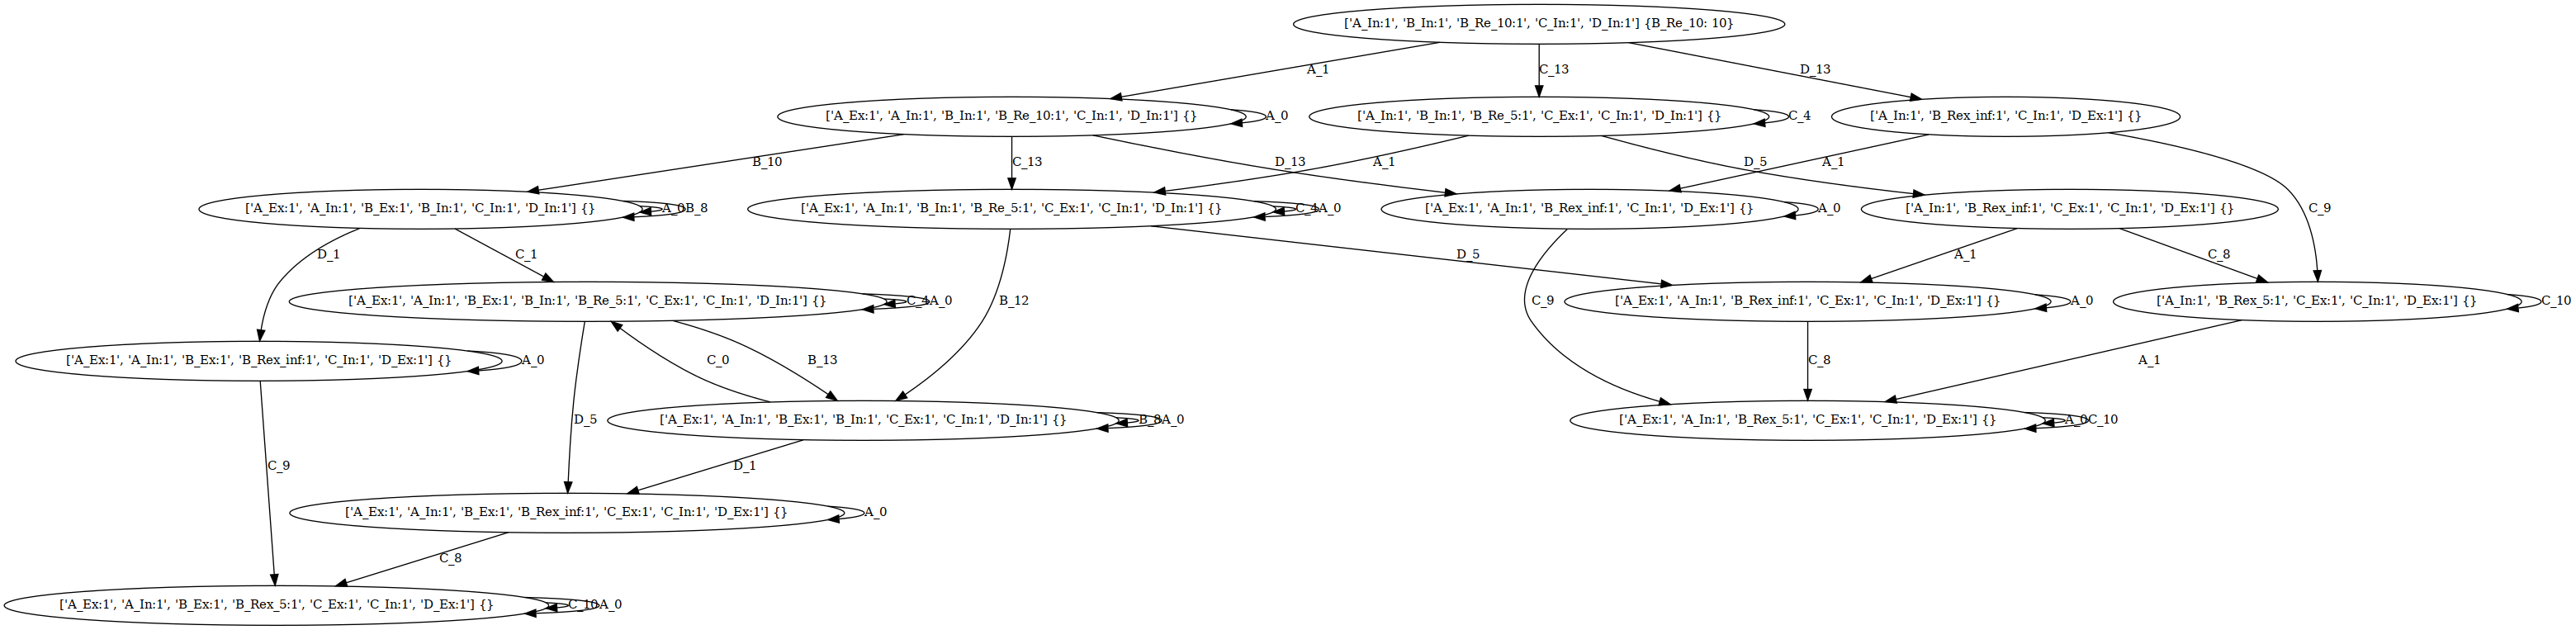

[i] export to models/abcd.tapn

\begin{tabular}{cr|c|c|c|c|c|c|c|c|c|c|c|c|c|c}
$ C, B, D, A $ & & \multicolumn{2}{c|}{A} & \multicolumn{8}{c|}{B} & \multicolumn{2}{c|}{C} & \multicolumn{2}{c}{D} \\ 
& &  In & Ex & In & Ex & Re(10) & Re(5) & Re(inf) & Rex(10) & Rex(5) & Rex(inf) & In & Ex & In & Ex \\ \cline{2-16} 
\multirow{1}{*}{A} & $t_{0}$ & \readArc{} & \readArc{} &  &  &  &  &  &  &  &  &  &  &  &  \\ \cline{2-16} 
 & $t_{1}$ & \readArc{} & \inhiboa{} &  &  &  &  &  &  &  &  &  &  &  &  \\ \hline 
\multirow{7}{*}{B} & $t_{0}$ &  &  & \readArc{} & \readArc{} & \inhib{} & \inhib{} & \inhib{} &  &  &  &  &  &  &  \\ \cline{2-16} 
 & $t_{1}$ &  &  & \readArc{} & \inhiboa{} & \inhib{} & \inhib{} & \inhib{} &  &  &  &  &  &  &  \\ \cline{2-16} 
 & $t_{2}$ &  &  & \readArc{} & \inhiboa{} & \ia{} &  &  &  &  &  &  &  &  &  \\ \cline{2-16} 
 & $t_{3}$ &  &  & \readArc{} & \readArc{} & \ia{} &  &  &  &  &  &  &  &  &  \\ \cline{2-16} 
 & $t_{4}$ &  &  & \readArc{} & \inhiboa{} &  & \ia{} &

In [4]:
from pm4py.objects.conversion.dcr_apt.variants.to_timed_arc_petri_net import Dcr2TimedArcPetri

example_dcr = {
    'events': {'A','B','C','D'},
    'conditionsFor': {'B':{'A'}},
    'milestonesFor': {},
    'responseTo': {'C':{'B'},'D':{'B'}},
    'noResponseTo': {},
    'includesTo': {},
    'excludesTo': {'D': {'B','D'}},
    'marking': {'executed': set(),
                'included': {'A','B','C','D'},
                'pending': set(),
                'pendingDeadline': {'B':10},
                },
    'conditionsForDelays': {'B':{'A':3}},
    'responseToDeadlines': {'C':{'B':5}},
}

debug = True

dcr2tapn = Dcr2TimedArcPetri(debug=debug,preoptimize=False, postoptimize=True)
tapn, m, master_df = dcr2tapn.apply(example_dcr,tapn_path=f'models/abcd.tapn')
if debug:
    for k,v in dcr2tapn.aprs.items():
        print()
        v = v.sort_index(axis=0)[['A','B','C','D']]
        tabular = table_to_latex_general(v,k,example_dcr,dcr2tapn.delay_dict)
        print(tabular)

# For matrix multiplications

In [79]:
example_dcr = {
    'events': {'A','B','C','D'},
    'conditionsFor': {'B':{'A'}},
    'milestonesFor': {},
    'responseTo': {'C':{'B',}},
    'noResponseTo': {},
    'includesTo': {},
    'excludesTo': {'D': {'B'}},
    'marking': {'executed': set(),
                'included': {'A','B','C','D'},
                'pending': set(),
                'pendingDeadline': {'B':10},
                },
    'conditionsForDelays': {'B':{'A':3}},
    'responseToDeadlines': {'C':{'B':5}},
}

debug = True

dcr2tapn = Dcr2TimedArcPetri(debug=debug,preoptimize=False, postoptimize=False)
tapn, m, master_df = dcr2tapn.apply(example_dcr,tapn_path=f'models/abcd.tapn')
if debug:
    for k,v in dcr2tapn.aprs.items():
        print()
        tabular = table_to_latex_matrix(v,k,example_dcr,dcr2tapn.delay_dict)
        print(tabular)

[i] mapping events
[i] handle all relations
[i] Step frozenset({'excludesTo'}) ('D', 'B')
[i] Step frozenset({'responseTo'}) ('C', 'B')
[i] Step frozenset({'conditionsFor'}) ('B', 'A')
[i] export to models/abcd.tapn

\begin{tabular}{cr|c|c|c|c|c|c|c|c|c|c|c|c}
$ B, A, C, D $ & & \multicolumn{6}{c|}{B} & \multicolumn{2}{c|}{A} & \multicolumn{2}{c|}{C} & \multicolumn{2}{c}{D} \\ 
& &  In & Ex & Re(10) & Re(5) & Rex(10) & Rex(5) & In & Ex & In & Ex & In & Ex \\ \cline{2-14} 
$\readArc$ & $\readArc$ & $\inhib$ & $\inhib$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ \\ 
$\readArc$ & $\inhiboa$ & $\inhib$ & $\inhib$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ \\ 
$\readArc$ & $\inhiboa$ & $\ia$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ \\ 
$\readArc$ & $\readArc$ & $\ia$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ \\ 
$\readArc$ & $\inhiboa$ & $0$ & $\ia$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ & $0$ \\ 
$\readArc$ & $\readArc$ & $0$ & $\ia$ & $0$ & $0$ & $0$ &

In [155]:
example_dcr = {
    'events': {'A','B'},
    'conditionsFor': {},
    'milestonesFor': {},
    'responseTo': {'A':{'B'}},
    'noResponseTo': {},
    'includesTo': {},
    'excludesTo': {},
    'marking': {'executed': set(),
                'included': {'A','B'},
                'pending': {'B'},
                'pendingDeadline': {},
                },
    'conditionsForDelays': {},
    'responseToDeadlines': {},
}

dcr2tapn = Dcr2TimedArcPetri(debug=False,preoptimize=True, postoptimize=False)
tapn, m, master_df = dcr2tapn.apply(example_dcr,tapn_path=f'models/debug.tapn')
print(table_to_latex_general(master_df,'response',example_dcr,dcr2tapn.delay_dict))

\begin{tabular}{cr|c}
$ response $ & & \multicolumn{1}{c}{B} \\ 
& &  Re(inf) \\ \cline{2-3} 
\multirow{1}{*}{B} & $t_{0}$ & \inhib{} \\ \cline{2-3} 
 & $t_{1}$ & \ia{} \\ \hline 
\multirow{1}{*}{A} & $t_{0}$ & \inhiboa{} \\ \cline{2-3} 
 & $t_{1}$ & \readArc{} \\
\end{tabular}


## Reduction rules

In [ ]:
for k, v in red_rules.items():
    print(f'{rel_to_tex(k)} & {rel_to_tex(v)} \\\\ \\hline')